In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
import acquire
import prepare
from wordcloud import WordCloud
import nltk.sentiment
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-7e378cf14cb2>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# 1. Spam Data

## a. Load the spam data set.

In [2]:
#acquire data from spam_db

from env import user, password, host

# def get_db_url(database, host=host, user=user, password=password):
#     return f'mysql+pymysql://{user}:{password}@{host}/{database}'


# url = get_db_url("spam_db")
# sql = "SELECT * FROM spam"

# df = pd.read_sql(sql, url, index_col="id")

raw = pd.read_csv("spam_clean - spam_clean.csv")

raw.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [3]:
import prepare
raw['cleaned']=raw.text.apply(prepare.basic_clean).apply(prepare.tokenize)\
.apply(prepare.remove_stopwords, extra_words=[], 
                                   exclude_words=[])
# df.head()

In [4]:
raw['stemmed'] = raw.cleaned.apply(prepare.stem)
# df.head()

In [5]:
raw['lemmatized']= raw.cleaned.apply(prepare.lemmatize)

In [6]:
raw.head()

,label,text,cleaned,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine got amore wat,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetcs apply 08452810075over18s
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though


In [7]:
raw.label.value_counts(normalize = True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [8]:
lemmatized_df = raw.drop(columns=['text','cleaned','stemmed'])
lemmatized_df.head(1)

,label,lemmatized
0,ham,go jurong point crazy available bugis n great world la e buffet cine got amore wat


In [9]:
# def clean(text):
#     '''Simplified text cleaning function'''
#     text = text.lower()
#     text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#     return re.sub(r"[^a-z0-9\s]", '', text)

In [10]:
# combine all messages in single string by label

ham_words = (' '.join(raw[raw.label == 'ham'].lemmatized))
spam_words = (' '.join(raw[raw.label == 'spam'].lemmatized))
all_words = (' '.join(raw.lemmatized))

In [11]:
# ham_words

## b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

<AxesSubplot:>

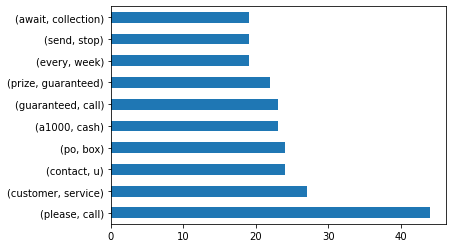

In [12]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()

In [13]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split()))
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
spam_bigrams.head(10),

(0    (free, entry)
 1    (entry, 2)   
 2    (2, wkly)    
 3    (wkly, comp) 
 4    (comp, win)  
 5    (win, fa)    
 6    (fa, cup)    
 7    (cup, final) 
 8    (final, tkts)
 9    (tkts, 21st) 
 dtype: object,)

In [14]:
# data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}

In [15]:
# len(data)

In [16]:
sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [17]:
def make_bigrams_list(series):
    bigrams_list = []
    for bigram in series:
        bigram = list(bigram)
        bigram = ' '.join(bigram)
        bigrams_list.append(bigram)
    return bigrams_list

In [18]:
# make_bigrams_list(spam_bigrams)

In [19]:
# this code was working earlier and helped me create the above function. 
# commenting out and moving forwar for now


# for bigram in spam_bigrams:
#     biggy = list(bigram)
#     biggy = ' '.join(biggy)
#     print(biggy)


#### Ok good work getting the VADER analysis on each bigram. Now, get it in a DF

In [24]:
# test = pd.DataFrame(pd.Series(pd.Series(nltk.bigrams(spam_words.split()))),columns=['bigram'])
# test.head()

big_spam_df = pd.DataFrame(pd.Series(make_bigrams_list(spam_bigrams)),columns=['bigram'])
big_spam_df.head()

,bigram
0,free entry
1,entry 2
2,2 wkly
3,wkly comp
4,comp win


In [25]:

big_spam_df.shape

(12504, 1)

In [26]:
big_spam_df['sentiment'] = big_spam_df.bigram.apply(lambda doc: sia.polarity_scores(doc)['compound'])

big_spam_df['label'] = 'spam'
big_spam_df.head()


,bigram,sentiment,label
0,free entry,0.5106,spam
1,entry 2,0.0000,spam
2,2 wkly,0.0000,spam
3,wkly comp,0.0000,spam
4,comp win,0.5859,spam


### Great work, got the VADER sentiment analysis for each bigram

In [27]:
big_spam_df.sort_values(by='sentiment')

,bigram,sentiment,label
183,jersey devil,-0.6597,spam
184,devil detroit,-0.6597,spam
9811,potential abuse,-0.6369,spam
11216,tsunami disaster,-0.6249,spam
5706,bitch go,-0.5859,spam
...,...,...,...
5082,love satisfy,0.8020,spam
7670,fun great,0.8126,spam
4259,win winner,0.8225,spam
10579,win winner,0.8225,spam


In [28]:
big_spam_df[big_spam_df.sentiment < 0].sort_values(by='sentiment').head(10)

,bigram,sentiment,label
183,jersey devil,-0.6597,spam
184,devil detroit,-0.6597,spam
9811,potential abuse,-0.6369,spam
11216,tsunami disaster,-0.6249,spam
5706,bitch go,-0.5859,spam
5013,po box,-0.5574,spam
5113,uk po,-0.5574,spam
5114,po box,-0.5574,spam
5164,ntt po,-0.5574,spam
5165,po box,-0.5574,spam


In [29]:
big_spam_df[big_spam_df.sentiment > 0].sort_values(by='sentiment').tail(10)

,bigram,sentiment,label
8278,win free,0.7964,spam
6575,sunshine congratulation,0.7964,spam
3694,win free,0.7964,spam
4093,win vip,0.7964,spam
4178,win free,0.7964,spam
5082,love satisfy,0.8020,spam
7670,fun great,0.8126,spam
10579,win winner,0.8225,spam
4259,win winner,0.8225,spam
10428,win super,0.8271,spam


In [30]:
big_spam_df.bigram.value_counts()

please call                       44
customer service                  27
contact u                         24
po box                            24
guaranteed call                   23
                                  ..
100 filthy                        1 
back chat                         1 
racal libertine                   1 
150ppmpobox10183bhamb64xe xmas    1 
every wktxt                       1 
Name: bigram, Length: 7036, dtype: int64

### my dataframe is messed up, in that it is composed of the value_counts on the bigrams, not handy for further explo.  fixing now...

### ALL FIXED

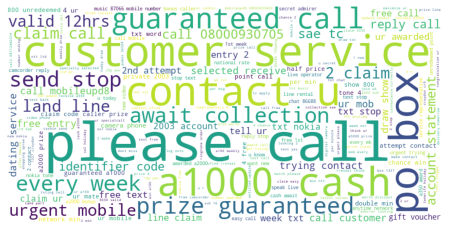

In [31]:
# value_counts bc we want the most commonly occuring bigrams at the forefront
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split())).value_counts()


data = {k[0] + ' ' + k[1]: v for k, v in spam_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

- that’s a dictionary comprehension - kinda like a list comprehension but w/ dictionary keys and values
- the convention is `k` for the key name and `v` for the value that that particular key points to

In [32]:
# this would be to have a look at the ham bigrams
# pd.Series(nltk.bigrams(ham_words.split())).value_counts()#.head(10).plot.barh()

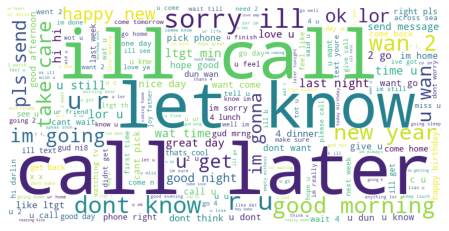

In [33]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split())).value_counts()
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
# ham_bigrams.head()
data = {k[0] + ' ' + k[1]: v for k, v in ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

<AxesSubplot:>

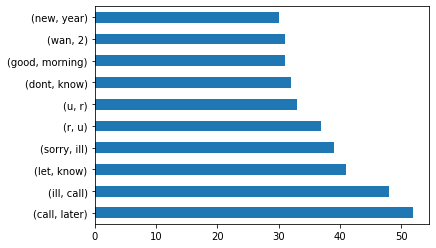

In [34]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()

In [35]:
ham_bigrams = pd.Series(nltk.bigrams(ham_words.split()))
# ham_bigrams = nltk.ngrams(ham_words.split(), 2)
ham_bigrams.head(),

(0    (go, jurong)      
 1    (jurong, point)   
 2    (point, crazy)    
 3    (crazy, available)
 4    (available, bugis)
 dtype: object,)

In [36]:
# test = pd.DataFrame(pd.Series(pd.Series(nltk.bigrams(spam_words.split()))),columns=['bigram'])
# test.head()

big_ham_df = pd.DataFrame(pd.Series(make_bigrams_list(ham_bigrams)),columns=['bigram'])
big_ham_df.head()


,bigram
0,go jurong
1,jurong point
2,point crazy
3,crazy available
4,available bugis


In [37]:
big_ham_df.shape

(39825, 1)

In [38]:
big_ham_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39825 entries, 0 to 39824
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bigram  39825 non-null  object
dtypes: object(1)
memory usage: 311.3+ KB


In [39]:
big_ham_df['sentiment'] = big_ham_df.bigram.apply(lambda doc: sia.polarity_scores(doc)['compound'])

big_ham_df['label'] = 'ham'
big_ham_df.head()


,bigram,sentiment,label
0,go jurong,0.00,ham
1,jurong point,0.00,ham
2,point crazy,-0.34,ham
3,crazy available,-0.34,ham
4,available bugis,0.00,ham


In [40]:
big_ham_df.sort_values(by='sentiment')

,bigram,sentiment,label
30607,motherfucker hurt,-0.8402,ham
23519,arrested murderer,-0.8271,ham
17302,arrested murderer,-0.8271,ham
19249,arrested murderer,-0.8271,ham
440,pain killing,-0.8271,ham
...,...,...,...
29353,love loving,0.8442,ham
14353,love lmao,0.8442,ham
35915,love great,0.8519,ham
25625,love great,0.8519,ham


In [42]:
big_ham_df.bigram.value_counts()

call later       52
ill call         48
let know         41
sorry ill        39
r u              37
                 ..
except gud       1 
neglect msg      1 
amp imf          1 
stocked sorry    1 
touch pls        1 
Name: bigram, Length: 31377, dtype: int64

## c. Is there any overlap in the bigrams for the spam data and the ham data?

In [50]:
bigram_df = big_spam_df.merge(big_ham_df, how='outer')
bigram_df.head()

,bigram,sentiment,label
0,free entry,0.5106,spam
1,free entry,0.5106,spam
2,free entry,0.5106,spam
3,free entry,0.5106,spam
4,free entry,0.5106,spam


In [52]:
bigram_df.shape

(52329, 3)

In [54]:
bigram_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52329 entries, 0 to 52328
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bigram     52329 non-null  object 
 1   sentiment  52329 non-null  float64
 2   label      52329 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [55]:
bigram_df.describe()

,sentiment
count,52329.000000
mean,0.059386
std,0.220289
min,-0.840200
25%,0.000000
50%,0.000000
75%,0.000000
max,0.855500


- the average sentiment is just above neutral, and roughly equal max/min

In [56]:
bigram_df.head(2)

,bigram,sentiment,label
0,free entry,0.5106,spam
1,free entry,0.5106,spam


In [62]:
# bigram_df[bigram_df[bigram_df.label == 'spam'].bigram & bigram_df[bigram_df.label == 'ham'].bigram]

In [80]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split()))


ham_bigram_freq = pd.Series(make_bigrams_list(ham_bigrams)).value_counts()
spam_bigram_freq = pd.Series(make_bigrams_list(spam_bigrams)).value_counts()
# all_freq = pd.Series(all_words.split()).value_counts()

In [82]:
spam_bigram_freq

please call                       44
customer service                  27
contact u                         24
po box                            24
guaranteed call                   23
                                  ..
100 filthy                        1 
back chat                         1 
racal libertine                   1 
150ppmpobox10183bhamb64xe xmas    1 
every wktxt                       1 
Length: 7036, dtype: int64

In [83]:
word_counts = pd.concat([ham_bigram_freq, spam_bigram_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham_bigram', 'spam_bigram']
word_counts.head()

,ham_bigram,spam_bigram
call later,52,0
ill call,48,0
let know,41,0
sorry ill,39,0
r u,37,3


In [87]:
word_counts[word_counts.ham_bigram == word_counts.spam_bigram].head(20)

,ham_bigram,spam_bigram
u like,4,4
tonight want,2,2
send u,2,2
2 take,2,2
4 1,1,1
left message,1,1
reply free,1,1
little time,1,1
x u,1,1
text get,1,1


## d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

Explore the blog articles using the techniques discussed in the exploration lesson.

Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.